In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# Loading data
df = pd.read_csv('/content/youtube_data_UAT_clean.csv')

In [ ]:
df.head()

,video_id,title,release_date,views,likes,comments,tags,vid_length
0,tTVODRiVDCg,UAT Cyber Ninjas,2025-03-06 22:04:28+00:00,60,3,0,Not available,00:01:30
1,W5SA-6wphWA,2024 Valedictorian Tyler Widener,2025-02-26 18:01:39+00:00,32,1,0,Not available,00:00:16
2,4FXI2GgEus8,Your Idea of Fun is tech,2025-02-26 17:59:15+00:00,452,8,0,Not available,00:00:04
3,IfrdgzxlgFE,Looking for future UAT Students,2025-02-26 17:51:14+00:00,725,33,0,Not available,00:00:06
4,a6lS9iEcr70,Check out University of Advancing Technology,2025-02-26 17:49:12+00:00,455,10,0,Not available,00:00:06


In [ ]:
import re

total_tags = []

for tags in df['tags']:
  if isinstance(tags, list):
    total_tags.extend(tags)  # Extending directly for lists
  elif isinstance(tags, str):
    # Removing brackets and split by commas for string
    # Use regex to remove brackets
    cleaned_tags = re.sub(r"[\[\]']", "", tags)
    total_tags.extend([tag.strip() for tag in cleaned_tags.split(',')])

# Counting frequency of each tag
most_frequent_tags = pd.Series(total_tags).value_counts()

# Obtaining top 10 most frequent tags
print(most_frequent_tags.head(10))

Not available                         150
UAT                                    44
technology                             21
university of advancing technology     21
#hangoutsonair                         18
#hoa                                   18
Hangouts On Air                        18
uat                                    16
college                                16
innovation                             15
Name: count, dtype: int64


In [ ]:
# Finding best performing tags
df_views = df.groupby(['views']).sum().sort_values(by=['likes'], ascending=False)
df_views.head()

,video_id,title,release_date,likes,comments,tags,vid_length
views,,,,,,,
2496244,OtRrVrHx7Do,AR+VR+AI+Robotics Degrees | University of Adva...,2018-10-29 23:26:09+00:00,1817,40,"['education', 'virtual reality', 'higher educa...",00:01:31
35117,Lu5DI2MVwMM,How to Make an Articulate Silicone Hand,2014-11-04 14:49:33+00:00,499,10,['University Of Advancing Technology (College/...,00:11:00
6450,9SaGbMGmmbQ,Unbox our new 3D Printer with us in the Makers...,2024-02-08 15:54:56+00:00,485,0,Not available,00:00:12
68979,I9pDJ7oCZSU,How to Use a Caulking Gun,2014-11-04 14:49:33+00:00,464,30,['University Of Advancing Technology (College/...,00:04:13
124175,aSpimh0-Vvk,University of Advancing Technology Tour with Mo!,2022-08-17 19:59:48+00:00,435,5,"['University', 'Technology University', 'Unive...",00:01:03


In [ ]:
df_views['tags'] = df_views['tags'].apply(lambda x: x.split(','))
df_views.head()

,video_id,title,release_date,likes,comments,tags,vid_length
views,,,,,,,
2496244,OtRrVrHx7Do,AR+VR+AI+Robotics Degrees | University of Adva...,2018-10-29 23:26:09+00:00,1817,40,"[['education', 'virtual reality', 'higher ed...",00:01:31
35117,Lu5DI2MVwMM,How to Make an Articulate Silicone Hand,2014-11-04 14:49:33+00:00,499,10,[['University Of Advancing Technology (College...,00:11:00
6450,9SaGbMGmmbQ,Unbox our new 3D Printer with us in the Makers...,2024-02-08 15:54:56+00:00,485,0,[Not available],00:00:12
68979,I9pDJ7oCZSU,How to Use a Caulking Gun,2014-11-04 14:49:33+00:00,464,30,[['University Of Advancing Technology (College...,00:04:13
124175,aSpimh0-Vvk,University of Advancing Technology Tour with Mo!,2022-08-17 19:59:48+00:00,435,5,"[['University', 'Technology University', 'Un...",00:01:03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      289 non-null    object
 1   title         289 non-null    object
 2   release_date  289 non-null    object
 3   views         289 non-null    int64 
 4   likes         289 non-null    int64 
 5   comments      289 non-null    int64 
 6   tags          289 non-null    object
 7   vid_length    289 non-null    object
dtypes: int64(3), object(5)
memory usage: 18.2+ KB


In [ ]:
# Check the data type of the first element in the 'tags' column
print(type(df_views['tags'].iloc[0]))

# Verify if element is of type list
if type(df_views['tags'].iloc[0]) == list:
    print("The elements in column 'tags' is already of type 'list'")
else:
    print("Consider converting your elements to type list with apply")
    df_views['tags'] = df_views['tags'].apply(lambda x: x if isinstance(x,list) else [x])

<class 'list'>
The elements in column 'tags' is already of type 'list'


In [ ]:
def top_performing_tags(df):

  # Resetting index to make 'views' a column again
  df = df.reset_index()

  # Creating new df with flattened tags column and views
  tags_df = df.explode('tags')[['tags', 'views']]

  # Aggregating views according to tag
  tag_performance = tags_df.groupby('tags')['views'].sum().reset_index()

  # Sorting by views in descending order
  top_tags = tag_performance.sort_values(by='views', ascending=False)

  return top_tags

In [ ]:
top_tags = top_performing_tags(df_views)
top_tags.head(10)

,tags,views
589,'uat',2638109
602,'university of advancing technology',2577184
262,'artificial intelligence',2574299
614,'virtual reality',2572392
404,'higher education',2561084
620,'vr',2538735
255,'ar',2538735
264,'augmented reality',2529901
518,'stem education',2497561
249,'ai',2497494


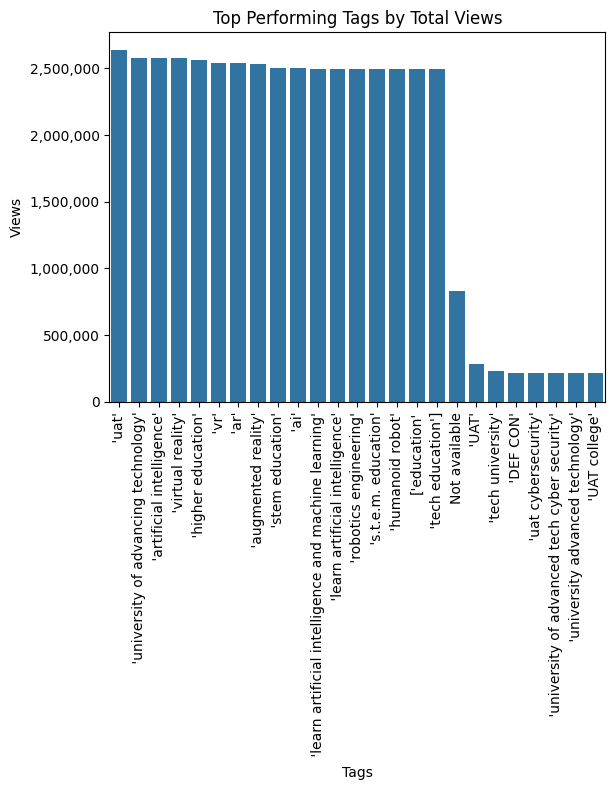

In [ ]:
import matplotlib.ticker as ticker

sns.barplot(x='tags', y='views', data=top_tags.head(25), orient='v')
# Format the y-axis tick labels
ax = plt.gca()  # Get the current axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xlabel('Tags')
plt.ylabel('Views')
plt.title('Top Performing Tags by Total Views')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def tag_performance_with_frequency(df, p=1):
  # Resetting index to make 'views' a column again
  df = df.reset_index()

  # Step 1: Explode the 'tags' column to flatten the DataFrame
  tags_df = df.explode('tags')[['tags', 'views']]

  # Step 2: Count the number of videos each tag appears in
  tag_counts = tags_df.groupby('tags')['tags'].count().reset_index(name='tag_count')

  # Step 3: Aggregate views by tag
  tag_views = tags_df.groupby('tags')['views'].sum().reset_index()

  # Step 4: Merge views and tag counts into one DataFrame
  tag_stats = pd.merge(tag_counts, tag_views, on='tags')

  # Step 5: Compute the tag score using the formula
  tag_stats['tag_score'] = tag_stats['views'] / (tag_stats['tag_count'] ** p)

  # Step 6: Sort by the tag score in descending order
  top_tags = tag_stats.sort_values(by='tag_score', ascending=False)

  return top_tags

In [ ]:
top_tags_with_frequency = tag_performance_with_frequency(df_views, p=1)
top_tags_with_frequency.head()

,tags,tag_count,views,tag_score
412,'humanoid robot',1,2496244,2496244.0
435,'learn artificial intelligence',1,2496244,2496244.0
434,'learn artificial intelligence and machine le...,1,2496244,2496244.0
536,'tech education'],1,2496244,2496244.0
489,'robotics engineering',1,2496244,2496244.0


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression

In [ ]:
def linear_regression_analysis(df):
  # Resetting index to make 'views' a column again
  df = df.reset_index()

  # One-hot encoding tags
  mlb = MultiLabelBinarizer()
  tag_matrix = mlb.fit_transform(df['tags'])
  tag_df = pd.DataFrame(tag_matrix, columns=mlb.classes_)

  # Combining one-hot encoded tags with views
  tag_df['views'] = df['views']

  # Initiating x and y values
  X = tag_df.drop(columns=['views'])
  y = tag_df['views']

  # Fitting linear regression model
  model = LinearRegression()
  model.fit(X, y)

  # Obtaining coefficients (Importance of tags)
  coefficients = pd.DataFrame(model.coef_, columns=['Coefficient'], index=X.columns)
  sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

  return sorted_coefficients

In [ ]:
coefficients = linear_regression_analysis(df_views)
print(coefficients)

                                                      Coefficient
['education'                                        201560.183284
 'humanoid robot'                                   201560.183284
 'learn artificial intelligence and machine lea...  201560.183284
 'learn artificial intelligence'                    201560.183284
 'robotics engineering'                             201560.183284
...                                                           ...
 'shark tank'                                       -45298.877515
 'go-to-market strategy'                            -45298.877515
 'tech school'                                      -48783.062422
 'tech university'                                  -55032.035875
 'Plaster (Visual Art Medium)'                      -66012.000000

[699 rows x 1 columns]


In [ ]:
def plot_coefficients(coefficients):
    # Plot the coefficients of the tags
    plt.figure(figsize=(15,6))
    sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
    plt.title('Tag Coefficients from Linear Regression')
    plt.xlabel('Tag')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=90)
    plt.show()

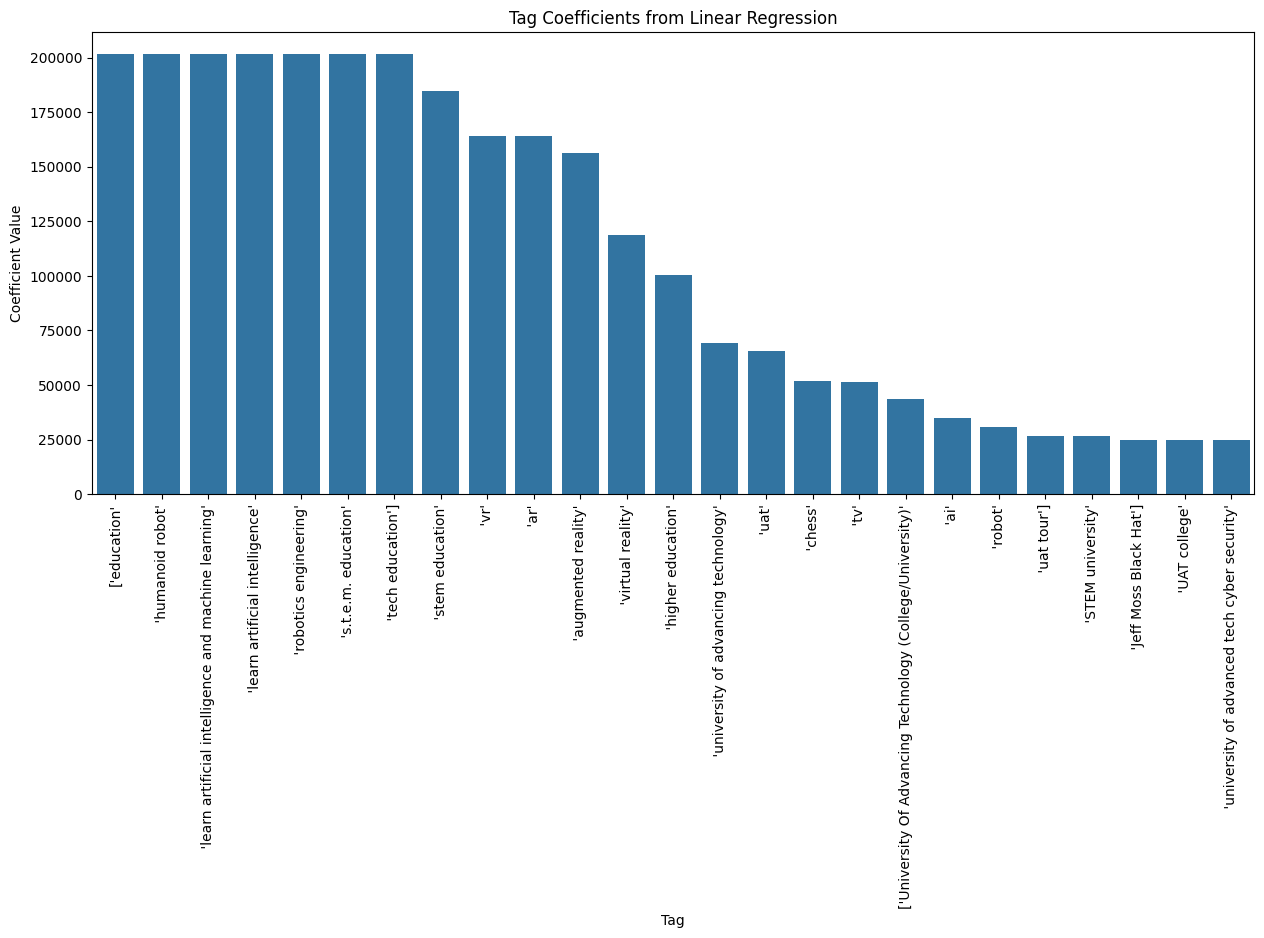

In [ ]:
top_coefficients = coefficients.head(25)
plot_coefficients(top_coefficients)

In [ ]:
# Calculating z-score of top video
from scipy.stats import zscore


def views_z_score(df):
  # Resetting index to make 'views' a column again
  df = df.reset_index()

  df['z_score'] = zscore(df['views'])
  df.head()
  return df

In [ ]:
views_z_score(df_views)

,views,video_id,title,release_date,likes,comments,tags,vid_length,z_score
0,2496244,OtRrVrHx7Do,AR+VR+AI+Robotics Degrees | University of Adva...,2018-10-29 23:26:09+00:00,1817,40,"[['education', 'virtual reality', 'higher ed...",00:01:31,15.223435
1,35117,Lu5DI2MVwMM,How to Make an Articulate Silicone Hand,2014-11-04 14:49:33+00:00,499,10,[['University Of Advancing Technology (College...,00:11:00,0.101659
2,6450,9SaGbMGmmbQ,Unbox our new 3D Printer with us in the Makers...,2024-02-08 15:54:56+00:00,485,0,[Not available],00:00:12,-0.074478
3,68979,I9pDJ7oCZSU,How to Use a Caulking Gun,2014-11-04 14:49:33+00:00,464,30,[['University Of Advancing Technology (College...,00:04:13,0.309715
4,124175,aSpimh0-Vvk,University of Advancing Technology Tour with Mo!,2022-08-17 19:59:48+00:00,435,5,"[['University', 'Technology University', 'Un...",00:01:03,0.648853
...,...,...,...,...,...,...,...,...,...
235,49,SoVx8Bk4PTI,Women in Technology - Helping Women Achieve Su...,2019-11-14 22:42:02+00:00,0,0,"[['Women in Tech', 'Women in Technology', 'G...",00:00:07,-0.113808
236,63,lTlGvJyPvi0,2016 UAT Commencement - Faculty Video,2016-05-19 00:08:01+00:00,0,0,"[['Commencement', 'graduation', 'technology'...",00:03:04,-0.113722
237,56,4x-gwXFKCGQ,Business Tech,2015-12-08 02:29:39+00:00,0,0,"[['Business Tech', 'Tech Trek', 'Tech Forum'...",00:49:00,-0.113765
238,82,AK_4Bj-4bLo,2016 UAT Commencement - Valedictorian Speech,2016-05-19 00:07:52+00:00,0,0,"[['commencement', 'graduation', 'college', ...",00:08:22,-0.113605


In [ ]:
# Dropping the highest performing video (outlier) to more closely examine other datapoints
df_views_standard = df_views.drop(df_views.index[0])

In [ ]:
df_views_standard.head(10)

,video_id,title,release_date,likes,comments,tags,vid_length
views,,,,,,,
35117,Lu5DI2MVwMM,How to Make an Articulate Silicone Hand,2014-11-04 14:49:33+00:00,499,10,[['University Of Advancing Technology (College...,00:11:00
6450,9SaGbMGmmbQ,Unbox our new 3D Printer with us in the Makers...,2024-02-08 15:54:56+00:00,485,0,[Not available],00:00:12
68979,I9pDJ7oCZSU,How to Use a Caulking Gun,2014-11-04 14:49:33+00:00,464,30,[['University Of Advancing Technology (College...,00:04:13
124175,aSpimh0-Vvk,University of Advancing Technology Tour with Mo!,2022-08-17 19:59:48+00:00,435,5,"[['University', 'Technology University', 'Un...",00:01:03
15007,sv9ijK4g8aA,Dr. Edgar D. Mitchell's Consicousness Presenta...,2011-07-05 22:33:51+00:00,428,27,"[['Dr. Edgar D. Mitchell', 'UAT', 'DaVinci S...",00:17:43
0,lD3WCIcRsosuett4h7O1U8-DOT-axE0PwMYFWxDGvUIku4...,UAT Graduation 2019Intro to Unity- Alex Bascom...,2019-05-03 22:31:17+00:002013-09-23 03:05:56+0...,291,19,"[Not available['#hangoutsonair', 'Hangouts On...",Unknown01:46:3601:03:3000:17:3901:18:3501:17:1...
38028,b-Un0EGbDeU,Campus Tour By Drone - University of Advancing...,2014-01-10 15:39:31+00:00,212,32,"[['Campus Tour', 'University Of Advancing Tec...",00:03:35
25654,7Dos0rmGAnc,University of Advancing Technology 360º Campus...,2018-11-20 19:37:51+00:00,189,6,"[['virtual reality', 'vr video', 'higher edu...",00:04:41
21889,qR9-xXz9kNU,Introduction to CryENGINE 3 Scripting,2013-04-18 22:44:23+00:00,189,33,[Not available],02:14:50


In [ ]:
X = df_views_standard['tags']
X.head()

,tags
0,[['University Of Advancing Technology (College...
1,[Not available]
2,[['University Of Advancing Technology (College...
3,"[['University', 'Technology University', 'Un..."
4,"[['Dr. Edgar D. Mitchell', 'UAT', 'DaVinci S..."


In [ ]:
# Reset the index to move 'views' from the index back to a regular column
df_views_standard = df_views_standard.reset_index()
y = df_views_standard['views']
y.head()

,views
0,35117
1,6450
2,68979
3,124175
4,15007


In [ ]:
# Multilabelbinarizer object
mlb = MultiLabelBinarizer()

# Fitting and transforming 'tags' column
X_encoded = mlb.fit_transform(X)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(191, 692)

In [ ]:
X_test.shape

(48, 692)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  5770.12359551, -14958.62934462,   1203.84108118,   5770.12359551,
         9113.53858916,  32310.29214323,  25498.30688508,   5770.12359551,
         6353.19429101,    242.11111111,   5770.12359551,   5770.12359551,
        44490.77061713,   5770.12359551,   5770.12359551,   5770.12359551,
        36307.42444297,    126.48282181,   4037.94453113,   5770.12359551,
         5770.12359551,   9304.22672848,  24301.52001462,   5770.12359551,
         5770.12359551,   5770.12359551,   6267.31646897,   5770.12359551,
          355.30475501,   3377.83378926,   7743.46330791,   5770.12359551,
         1519.56905996,   5770.12359551,   8419.63374599,   5770.12359551,
         5770.12359551,   -606.42174591,   7936.25092201,   5770.12359551,
         4663.4203039 ,   3120.32200772,  -2528.65386256,   5770.12359551,
         5770.12359551,   5770.12359551,    326.81642551,   5770.12359551])

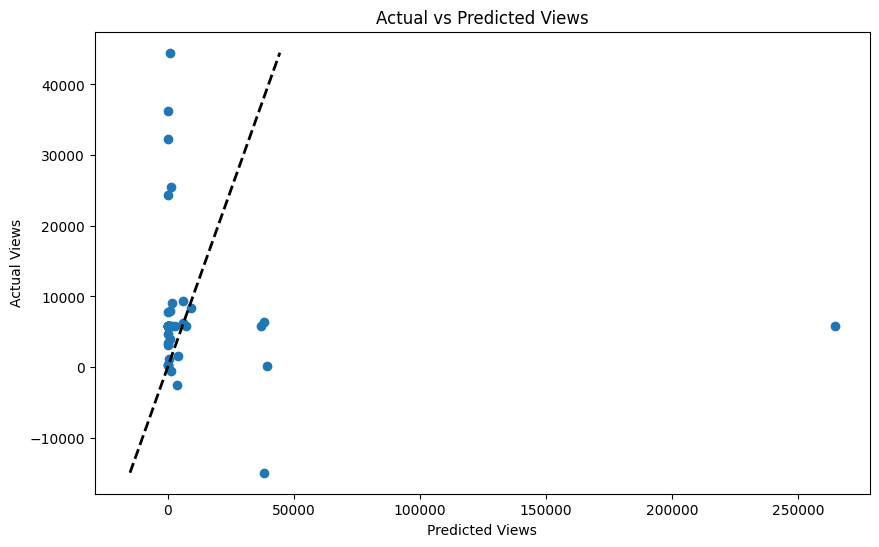

In [ ]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Views')
plt.xlabel('Predicted Views')
plt.ylabel('Actual Views')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1657099817.9285553
R-squared: -0.11336658856780435


In [ ]:
tags_corr = pd.DataFrame(X_encoded, columns=mlb.classes_)
tags_corr.head()


# Displaying most commonly used tags
tags_corr.head(10)

,"""America's""","""bachelor's degrees""","""master's degrees""",'#hoa'],'#hoa']['#hangoutsonair','100% STEM University'],'2010'],'2011 inductee','2012'],'2013',...,['new technology',['robot',['robotics',['tech college',['technology',['uat',['university of advancing technology',['university',['virtual reality',['women and tech'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
correlation_data = {'Actual Views': y_test, 'Predicted Views': y_pred}
correlation_df = pd.DataFrame(correlation_data)
correlation_df['Tags'] = pd.Series(mlb.inverse_transform(X_test)).apply(lambda x: ', '.join(x))

In [ ]:
correlation_df.corr()

ValueError: could not convert string to float: 'Not available'

In [ ]:
def plot_actual_vs_predicted(df, model):
  copy_df = df.reset_index()

  # Predict views using the regression model
  X = pd.get_dummies(copy_df['tags'].apply(pd.Series).stack(), prefix='', prefix_sep='').groupby(level=0).sum()

  # Get all tags from training and prediction data
  all_tags = X.columns

  # Reindex training data to include all tags
  X = X.reindex(columns=all_tags, fill_value=0)

  # Fitting the model if it has not been previously fit.
  # This is done to avoid 'NotFittedError'
  if not hasattr(model, 'coef_'):  # check if model has been fit
      all_tags = X.columns
      # Fit the model using the complete set of features
      model.fit(X, copy_df['views'])

  y_pred = model.predict(X)

  # Plot actual vs predicted views
  plt.figure(figsize=(10, 6))
  plt.scatter(copy_df['views'], y_pred)
  plt.plot([copy_df['views'].min(), copy_df['views'].max()], [copy_df['views'].min(), copy_df['views'].max()], 'k--', lw=2)
  plt.title('Actual vs Predicted Views')
  plt.xlabel('Actual Views')
  plt.ylabel('Predicted Views')
  plt.show()

  # Assigning y_pred and views from copy_df back to the original df
  df['y_pred'] = y_pred  # Assign predicted values to a new column in original df
  df['views'] = copy_df['views'] # Making sure views exists as column in the original df

  return y_pred

In [ ]:
model = LinearRegression()

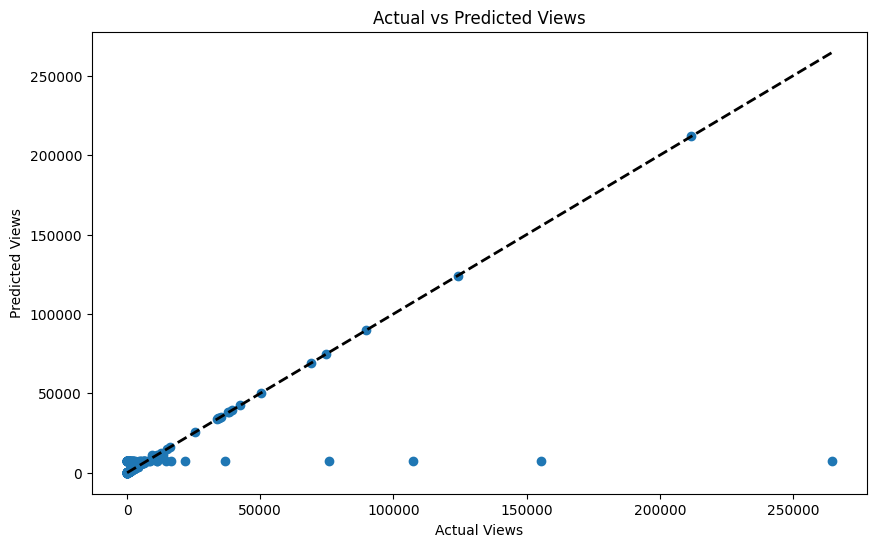

In [ ]:
# Example usage: After fitting the regression model
y_pred = plot_actual_vs_predicted(df_views_standard, model)

In [ ]:
# Evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score

y = df_views_standard['views']

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

NameError: name 'df_views_standard' is not defined